**Descripción general**
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


*Importar todas las libreria que utilizaremos en el Proyecto:*

In [24]:
import numpy as np
import sklearn as scikit_learn
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from matplotlib import style

In [25]:
data = np.load('C:\R_File\Master of Data Science\Python\Project\proyecto_data\proyecto_training_data.npy') 
xx = data
training_idx = np.random.randint(xx.shape[0], size=80)
test_idx = np.random.randint(xx.shape[0], size=20)
training, test = xx[training_idx,:], xx[test_idx,:]

**Analizando las variables.**

In [26]:
item=["precio", "Calif", "fsqrt","trooms","yearbuilt","LotFrontage"]
casadf = pd.DataFrame(data)
casadf.rename(columns={   0 :'precio',
                          1:'Calif',
                          2:'fsqrt',
                          3 :'trooms',
                          4: 'yearbuilt',
                          5 : 'LotFrontage'}, 
                 inplace=True)
casadf['precio']= casadf['precio']/1000
casadf['fsqrt']= casadf['fsqrt']/1000
casadf.fillna(0,inplace=True)

In [27]:
casadf.describe(include='all')

,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180.921196,6.099315,1.162627,6.517808,1971.267808,57.623288
std,79.442503,1.382997,0.386588,1.625393,30.202904,34.664304
min,34.900000,1.000000,0.334000,2.000000,1872.000000,0.000000
25%,129.975000,5.000000,0.882000,5.000000,1954.000000,42.000000
50%,163.000000,6.000000,1.087000,6.000000,1973.000000,63.000000
75%,214.000000,7.000000,1.391250,7.000000,2000.000000,79.000000
max,755.000000,10.000000,4.692000,14.000000,2010.000000,313.000000


**histograma de la variable.**

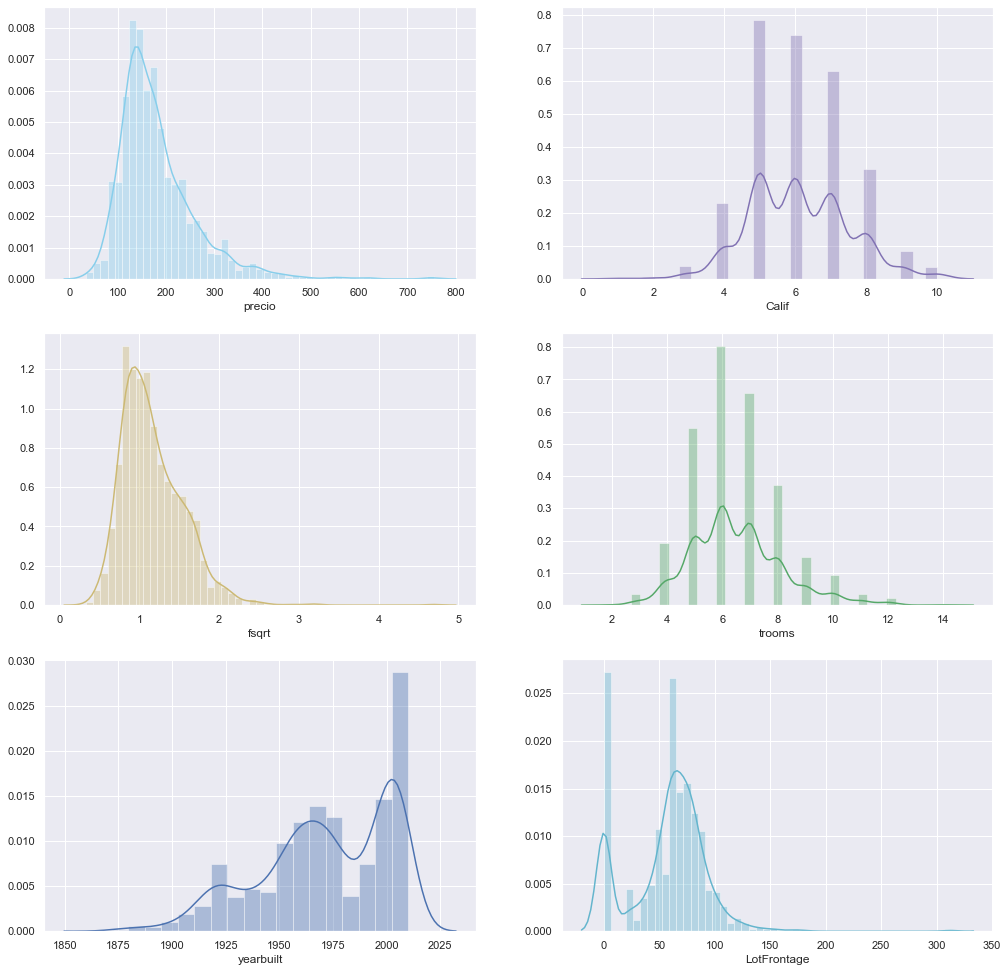

In [28]:
sb.set();

f,axes = plt.subplots(3,2,sharex=False, figsize=(17,17))
colors = ["skyblue","m","y","g","b","c"]
for i in range(0,len(item)): 
    sb.distplot(casadf[item[i]] , color=colors[i], ax=axes[i//2,i%2])
    
plt.show()

In [29]:

casadf.corr(method='pearson', min_periods=1)


,precio,Calif,fsqrt,trooms,yearbuilt,LotFrontage
precio,1.000000,0.790982,0.605852,0.533723,0.522897,0.209624
Calif,0.790982,1.000000,0.476224,0.427452,0.572323,0.176561
fsqrt,0.605852,0.476224,1.000000,0.409516,0.281986,0.245181
trooms,0.533723,0.427452,0.409516,1.000000,0.095589,0.221396
yearbuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.036853
LotFrontage,0.209624,0.176561,0.245181,0.221396,0.036853,1.000000


**Correlation de Variables.**
Basado la correlacion de los datos podemos indicar que:

* Calif 
* fsqrt

Son las mas predictivas

**Exploracion de Variables :**
Calcular el coeficiente de correlación entre x y y


graficar x vs y(scatterplot) usando matplotlib
Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 


Inicializar los parámetros del modelo en un vector (m,b), esto es equivalente a empezar el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x,y


**Test Model**

In [30]:
def manual_model(x,y,epochs,print_interval,lr):
    errors = np.zeros(epochs)
    uno = np.ones((x.shape[0],1))
    x_b = np.hstack((x,uno )) #matriz con x en la primer columna y 1 en la segun
    loss = {}
    par = np.array([0.1,0.2]) #[m,b]
    gradients = np.array([0.0,0.0])
   
    print_counter = 1
    for i in range(0,epochs):
        yhat = (np.dot(x_b,par)).reshape(-1,1)
        errors[i] = 0.5 * (np.average((y-yhat)**2))
        gradients = np.average((yhat[0]-y)*x_b, axis=0)
        par -= (lr*gradients)
        loss[i] = par.copy()
        if (print_counter % print_interval) == 0:
            print("Error: "+str(errors[i]))
        
        print_counter += 1
    return loss,errors


In [31]:
def plot_error(errors,title):
    plt.plot(range(0,errors.shape[0]),errors)
    plt.title(title+" - Errors")
    plt.show()



In [32]:
def plot_model(x,y,model, n):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    for i in range(n,len(model)+1,n):
        key = i-1
        yhat = (np.matmul(data,model[key])).reshape(-1,1)
        
        plt.plot()
        plt.scatter(x,y)
        plt.plot(x,yhat, color='g')
        plt.title("Iteración="+str(i)+", m="+str(round(model[key][0],2))+", b="+str(round(model[key][1],2)))
        plt.show()


**Creando el modelo a probar la variable Calif**

In [33]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","fsqrt"], axis=1).values
Y = casadf["precio"].values 
X = X.reshape(-1,1)
Y =Y.reshape(-1,1)

Error: 1540.5318375569227
Error: 1526.8265731849383
Error: 1514.0917825533772
Error: 1502.3249239901043
Error: 1491.5259974930677
Error: 1481.6950030622681
Error: 1472.831940697705
Error: 1464.9368103993797
Error: 1458.009612167292
Error: 1452.0503460014404


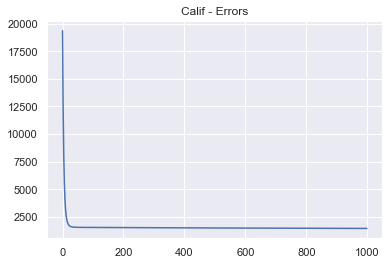

In [34]:
model, errors = manual_model(X,Y,1000,100,0.003)
plot_error(errors,item[1])

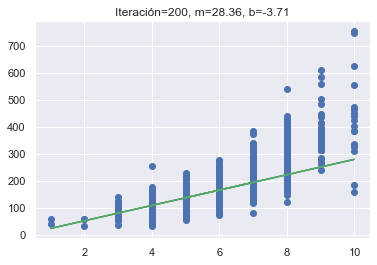

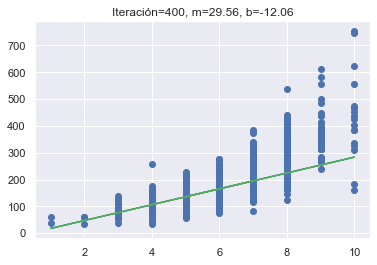

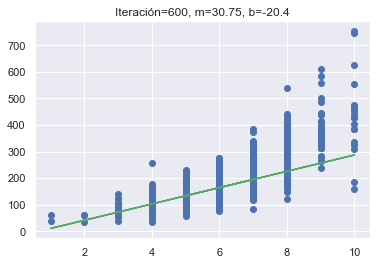

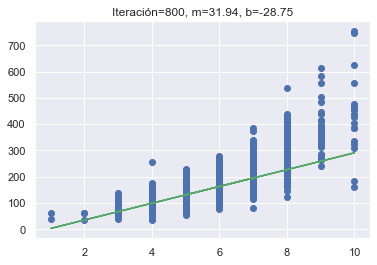

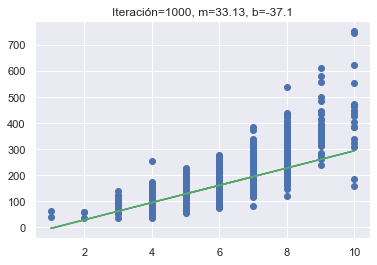

In [35]:
plot_model(X,Y,model,200)

**Creando el modelo a probar la variable Fsqrt**

In [36]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","Calif"], axis=1).values
Y = casadf["precio"].values 
X = X.reshape(-1,1)
Y =Y.reshape(-1,1)

Error: 2938.8938164566957
Error: 3439.1776545873363
Error: 3851.3210915856253
Error: 4344.471082622281
Error: 4922.097620256887
Error: 5584.267586184261
Error: 6330.982251516574
Error: 7162.2416401531345
Error: 8078.045752539448
Error: 9078.394588683612


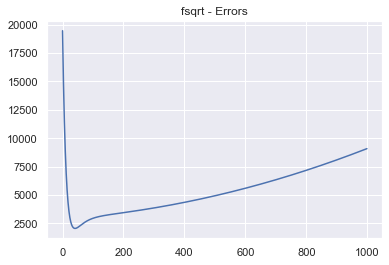

In [37]:

model_2, errors = manual_model(X,Y,1000,100,0.02)
plot_error(errors,item[2])


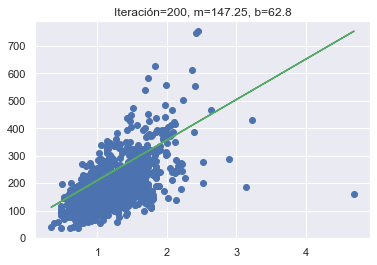

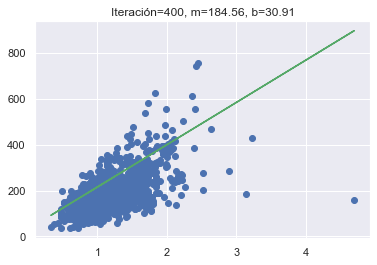

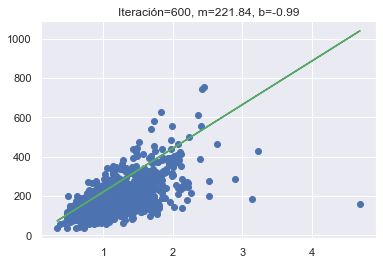

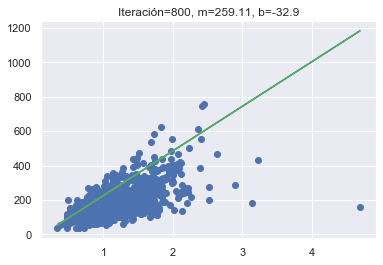

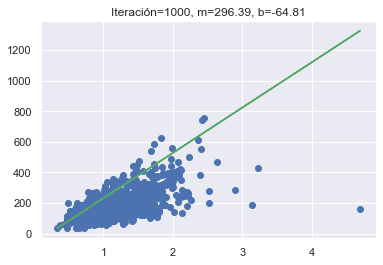

In [38]:
plot_model(X,Y,model_2,200)

**Modelo con scikit-learn**

In [39]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","fsqrt"], axis=1).values
y = casadf["precio"].values 
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)


reg = LinearRegression(n_jobs=-1)
reg.fit(X, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [40]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","Calif"], axis=1).values
Y = casadf["precio"].values
X = X.reshape(-1,1)
Y =Y.reshape(-1,1)
reg_1 = LinearRegression(n_jobs=-1)
reg_1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [41]:
def get_predictions(x, manual_model, sl_model):
    ones = np.ones((x.shape[0],1))
    data = np.hstack((x,ones))
    
    manual_pred = np.matmul(data,manual_model)
    sl_pred = sl_model.predict(x)
    avg_pred = (manual_pred + sl_pred)/2
        
    return manual_pred, sl_pred, avg_pred

In [42]:
def calculate_error(y,yhat):
    return (0.5 * (np.average((y-yhat)**2)))

**Creando el modelo a probar la variable Calif scikit-learn**

In [43]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","fsqrt"], axis=1).values
y = casadf["precio"].values 
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)

manual_pred_quality, sl_pred_quality, avg_pred_quality = get_predictions(X, model[(len(model)-1)], reg )
manual_error_quality = calculate_error(Y,manual_pred_quality)
sl_error_quality = calculate_error(Y,sl_pred_quality)
avg_error_quality = calculate_error(Y,avg_pred_quality)

print("Error Modelo Manual: "+str(round(manual_error_quality,2)))
print("Error Modelo scikit-learn: "+str(round(sl_error_quality,2)))
print("Error Promedio: "+str(round(avg_error_quality,2)))

Error Modelo Manual: 4329.44
Error Modelo scikit-learn: 1180.47
Error Promedio: 1967.71


**Creando el modelo a probar la variable Fsqrt scikit-learn**

In [44]:
X = casadf.drop(["precio","trooms","yearbuilt","LotFrontage","Calif"], axis=1).values
Y = casadf["precio"].values
X = X.reshape(-1,1)
Y =Y.reshape(-1,1)

manual_pred_1flrsf, sl_pred_1flrsf, avg_pred_1flrsf = get_predictions(X, model_2[(len(model_2)-1)],reg_1 )
manual_error_1flrsf = calculate_error(Y,manual_pred_1flrsf)
sl_error_1flrsf = calculate_error(Y,sl_pred_1flrsf)
avg_error_1flrsf = calculate_error(Y,avg_pred_1flrsf)

print("Error Modelo Manual: "+str(round(manual_error_1flrsf,2)))
print("Error Modelo scikit-learn: "+str(round(sl_error_1flrsf,2)))
print("Error Promedio: "+str(round(avg_error_1flrsf,2)))

Error Modelo Manual: 14599.9
Error Modelo scikit-learn: 1995.92
Error Promedio: 5146.91


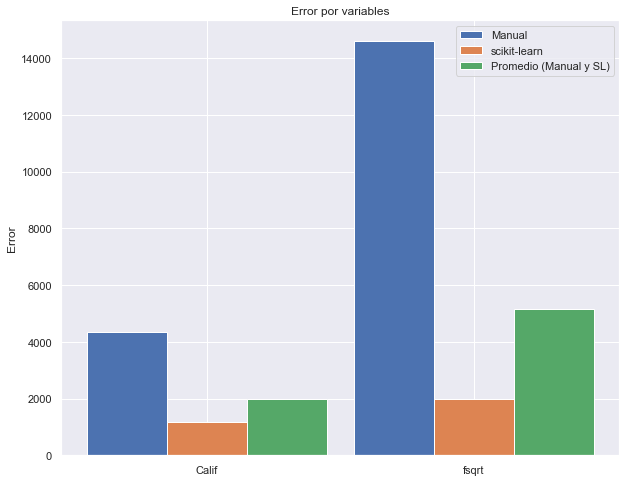

In [45]:

f, ax = plt.subplots(figsize=(10,8))
labels = [item[1], item[2]]
width = 0.30
x_plt = np.arange(len(labels))

rects1 = ax.bar(x_plt, (manual_error_quality,manual_error_1flrsf), width, label='Manual')
rects2 = ax.bar(x_plt + width, (sl_error_quality,sl_error_1flrsf), width, label='scikit-learn')
rects3 = ax.bar(x_plt + (2*width), (avg_error_quality,avg_error_1flrsf), width, label='Promedio (Manual y SL)')

ax.set_ylabel('Error')
ax.set_title('Error por variables')
ax.set_xticks(x_plt + width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

**Conclusión :**
Podemos observar que el modelo realizado con la funcion scikit-learn tiene un mayor control en el manejo de las variables y asi reduciendo el error en ambos modelos.